In [35]:
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data_archived = pd.read_csv("breach_report-archived-7years.csv", header=0, index_col=False )

In [3]:
cols = { "Name of Covered Entity" : "organization", 
         "State"                  : "state", 
         "Covered Entity Type"    : "entity_type", 
         "Individuals Affected"   : "individuals_affected", 
         "Breach Submission Date" : "date", 
         "Type of Breach"         : "breach_type", 
         "Location of Breached Information" : "data_location",
         "Business Associate Present"       : "associate", 
         "Web Description"        : "description"}

print(data_archived.shape)
data_archived.rename(columns=cols, inplace=True)
data_archived.head()

(2733, 9)


organization state          entity_type  \
0                 Summit Medical Associates    IN  Healthcare Provider   
1  Freeport Regional Health Care Foundation    IL  Healthcare Provider   
2           Muskingum Valley Health Centers    OH  Healthcare Provider   
3       Elkins Rehabilitation & Care Center    WV  Healthcare Provider   
4                      Rite Aid Corporation    PA  Healthcare Provider   

   individuals_affected        date          breach_type  \
0                7264.0  08/04/2020  Hacking/IT Incident   
1                4120.0  07/31/2020  Hacking/IT Incident   
2                7447.0  07/31/2020  Hacking/IT Incident   
3                3127.0  07/30/2020  Hacking/IT Incident   
4                9200.0  07/29/2020                Theft   

                               data_location associate description  
0                             Network Server        No         NaN  
1                                      Email        No         NaN  
2  Electronic Medical Record, Network Server        No         NaN  
3                                      Email        No         NaN  
4                                Paper/Films        No         NaN

In [4]:
data_investigating = pd.read_csv("breach_report-under-investigation-7years.csv", header=0, index_col=False )
data_investigating.rename(columns=cols, inplace=True)
print(data_investigating.shape)
data_investigating.head()

(578, 9)


organization state          entity_type  \
0                 Summit Medical Associates    IN  Healthcare Provider   
1  Freeport Regional Health Care Foundation    IL  Healthcare Provider   
2           Muskingum Valley Health Centers    OH  Healthcare Provider   
3       Elkins Rehabilitation & Care Center    WV  Healthcare Provider   
4                      Rite Aid Corporation    PA  Healthcare Provider   

   individuals_affected        date          breach_type  \
0                  7264  08/04/2020  Hacking/IT Incident   
1                  4120  07/31/2020  Hacking/IT Incident   
2                  7447  07/31/2020  Hacking/IT Incident   
3                  3127  07/30/2020  Hacking/IT Incident   
4                  9200  07/29/2020                Theft   

                               data_location associate  description  
0                             Network Server        No          NaN  
1                                      Email        No          NaN  
2  Electronic Medical Record, Network Server        No          NaN  
3                                      Email        No          NaN  
4                                Paper/Films        No          NaN

In [88]:
data = pd.concat([data_investigating, data_archived])
data = data.drop_duplicates()
data.shape

(2732, 9)

In [89]:
data = data.replace({'associate': {'Yes': True, 'No': False}})
dtypes = { 'state': 'category', 
           'entity_type': 'category', 
           'breach_type': 'category', 
           'data_location': 'category',
           'associate': bool, 
           'date': 'datetime64[ns]' }
data = data.astype( dtypes )
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2732 entries, 0 to 2732
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   organization          2732 non-null   object        
 1   state                 2723 non-null   category      
 2   entity_type           2729 non-null   category      
 3   individuals_affected  2731 non-null   float64       
 4   date                  2732 non-null   datetime64[ns]
 5   breach_type           2732 non-null   category      
 6   data_location         2732 non-null   category      
 7   associate             2732 non-null   bool          
 8   description           1955 non-null   object        
dtypes: bool(1), category(4), datetime64[ns](1), float64(1), object(2)
memory usage: 3.1 MB


In [90]:
print(data.associate.value_counts())
data.head()

False    2121
True      611
Name: associate, dtype: int64


organization state          entity_type  \
0                 Summit Medical Associates    IN  Healthcare Provider   
1  Freeport Regional Health Care Foundation    IL  Healthcare Provider   
2           Muskingum Valley Health Centers    OH  Healthcare Provider   
3       Elkins Rehabilitation & Care Center    WV  Healthcare Provider   
4                      Rite Aid Corporation    PA  Healthcare Provider   

   individuals_affected       date          breach_type  \
0                7264.0 2020-08-04  Hacking/IT Incident   
1                4120.0 2020-07-31  Hacking/IT Incident   
2                7447.0 2020-07-31  Hacking/IT Incident   
3                3127.0 2020-07-30  Hacking/IT Incident   
4                9200.0 2020-07-29                Theft   

                               data_location  associate description  
0                             Network Server      False         NaN  
1                                      Email      False         NaN  
2  Electronic Medical Record, Network Server      False         NaN  
3                                      Email      False         NaN  
4                                Paper/Films      False         NaN

In [91]:
def create_chart_data( df, breach_cat, period ):
    breach_bool = (df.breach_type == breach_cat)
    print(breach_bool.value_counts())
    subset = data[breach_bool]
    print(f"Subsetted data shape is {subset.shape}")
    subset.head(10)
    grouped_data = subset[['date', 'individuals_affected']].groupby('date')
    records_breached = grouped_data.sum()
    semiannual_rb = records_breached.resample(period, closed='left').sum()
    breach_count = grouped_data.count()
    semiannual_bc = breach_count.resample(period, closed='left').sum()
    data_to_chart = pd.concat([semiannual_rb, semiannual_bc], axis=1)
    data_to_chart.columns = ['breached_records', "number_of_breaches"]
    print(data_to_chart.shape)
    return data_to_chart

In [105]:
data_to_chart = create_chart_data(data, "Hacking/IT Incident", "6M")
data_to_chart.index = ['2013 H1', '2013 H2',
                       '2014 H1', '2014 H2',
                       '2015 H1', '2015 H2',
                       '2016 H1', '2016 H2',
                       '2017 H1', '2017 H2',
                       '2018 H1', '2018 H2',
                       '2019 H1', '2019 H2',
                       '2020 H1', '2020 H2']
data_to_chart.style.format('{:,}')

False    1686
True     1046
Name: breach_type, dtype: int64
Subsetted data shape is (1046, 9)
(16, 2)


In [106]:
def make_bar_chart( df, filename ):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(111) # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
    width = 0.4
    df.breached_records.plot(kind="bar", ax=ax, width=width, color='royalblue', position=1)
    df.number_of_breaches.plot(kind="bar", ax=ax2, width=width, color='darkseagreen', position=0)
    ax.set_ylabel('# of Records Breached (in 10s of millions)', fontsize=14)
    ax2.set_ylabel('Number of Breaches', fontsize=14)
    ax.legend(loc=(0.4, 0.9), frameon=False, fontsize=12)
    ax2.legend(loc=(0.4, 0.85), frameon=False, fontsize=12)
    plt.show()
    fig.savefig(f"{filename}.pdf")
    fig.savefig(f"{filename}.png")
    return

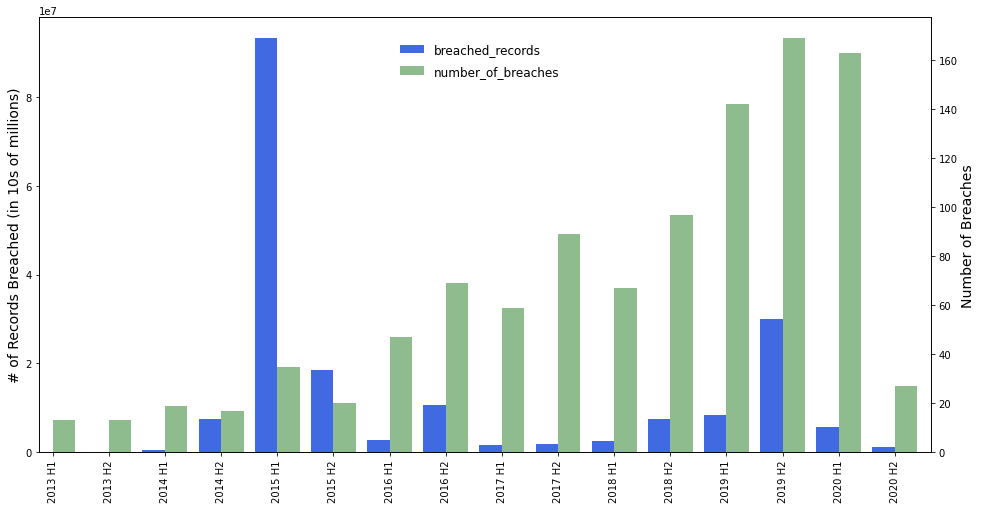

In [107]:
make_bar_chart( data_to_chart, "dhhs_breaches")

In [108]:
def breach_stats( t1, t2 ):
    r1 = data_to_chart.loc[t1,'breached_records']
    r2 = data_to_chart.loc[t2,'breached_records']
    b1 = data_to_chart.loc[t1,'number_of_breaches']
    b2 = data_to_chart.loc[t2,'number_of_breaches']
    delta_records = 100 * (r1-r2) / r2
    delta_breaches = 100 * (b1-b2) / b2
    word1, word2 = 'increased', 'increased'
    if delta_breaches < 0:
        word1 = 'decreased'
        delta_breaches *= -1
    if delta_records < 0:
        word2 = 'decreased'
        delta_records *= -1
    print(f"Between {t2} and {t1}, breaches {word1} by {delta_breaches:.1f}%")
    print(f"and the number of records compromised {word2} by {delta_records:.1f}%.")
    return

In [109]:
breach_stats( '2020 H1', '2019 H2')

Between 2019 H2 and 2020 H1, breaches decreased by 3.6%
and the number of records compromised decreased by 80.9%.


In [110]:
breach_stats( '2020 H1', '2019 H1')

Between 2019 H1 and 2020 H1, breaches increased by 14.8%
and the number of records compromised decreased by 31.5%.


In [111]:
data_to_chart = create_chart_data(data, "Hacking/IT Incident", "2M")
data_to_chart.reset_index( inplace = True )
data_to_chart["date"] = data_to_chart["date"].dt.strftime('%Y-%m')
data_to_chart.set_index("date", inplace=True)

False    1686
True     1046
Name: breach_type, dtype: int64
Subsetted data shape is (1046, 9)
(46, 2)


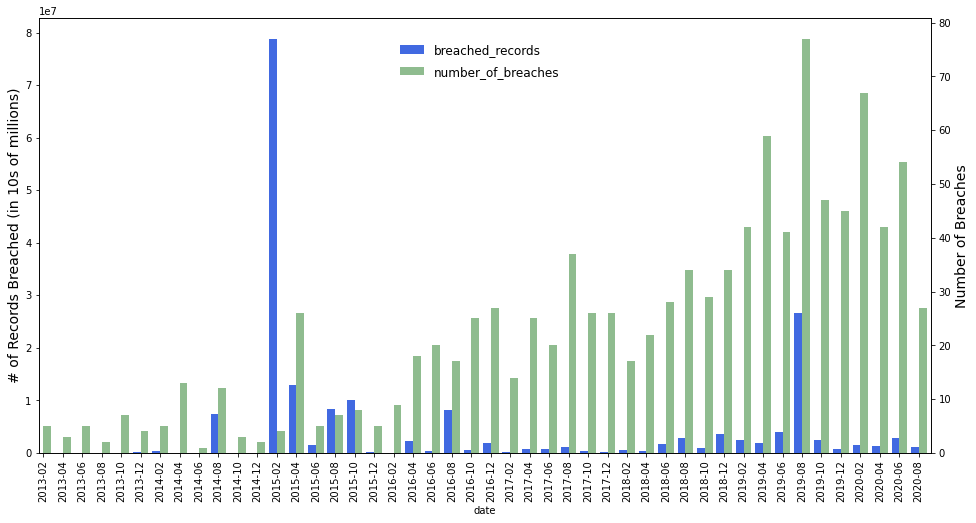

In [114]:
make_bar_chart( data_to_chart, "dhhs_breaches_bimonthly")

### Identify largest breaches

In [113]:
data2020 = data[ data["date"] >= '2019-01-01']
data2020.sort_values("individuals_affected", ascending=False).head(20)

organization state  \
445                                      Optum360, LLC    MN   
557  Laboratory Corporation of America Holdings dba...    NC   
448  Dominion Dental Services, Inc., Dominion Natio...    VA   
553              Clinical Pathology Laboratories, Inc.    TX   
474                      Inmediata Health Group, Corp.   NaN   
78                                Magellan Health Inc.    AZ   
520                                        UW Medicine    WA   
233                             Health Share of Oregon    OR   
34                       Florida Orthopaedic Institute    FL   
102                Elkhart Emergency Physicians, Inc .    IN   
381                          Women's Care Florida, LLC    FL   
566                                  CareCentrix, Inc.    CT   
388  Intramural Practice Plan - Medical Sciences Ca...   NaN   
521                    BioReference Laboratories Inc.     NJ   
540                       Bayamon Medical Center Corp.   NaN   
434  Memphis Pathology Laboratory d/b/a American Es...    TN   
551                 Sunrise Medical Laboratories, Inc.    NY   
757            Columbia Surgical Specialist of Spokane    WA   
392                                     Sarrell Dental    AL   
453                        Health Quest Systems, Inc.     NY   

                   entity_type  individuals_affected       date  \
445         Business Associate            11500000.0 2019-07-01   
557        Healthcare Provider            10251784.0 2019-07-13   
448                Health Plan             2964778.0 2019-06-21   
553        Healthcare Provider             1733836.0 2019-07-15   
474  Healthcare Clearing House             1565338.0 2019-05-07   
78                 Health Plan             1013956.0 2020-06-12   
520        Healthcare Provider              973024.0 2019-02-20   
233                Health Plan              654362.0 2020-02-05   
34         Healthcare Provider              640000.0 2020-07-01   
102        Healthcare Provider              550000.0 2020-05-28   
381        Healthcare Provider              528188.0 2019-09-25   
566        Healthcare Provider              467621.0 2019-07-11   
388        Healthcare Provider              439753.0 2019-09-16   
521        Healthcare Provider              425749.0 2019-07-30   
540        Healthcare Provider              422496.0 2019-07-19   
434        Healthcare Provider              409789.0 2019-07-15   
551        Healthcare Provider              401901.0 2019-07-15   
757        Healthcare Provider              400000.0 2019-02-18   
392        Healthcare Provider              391472.0 2019-09-12   
453        Healthcare Provider              372043.0 2019-05-31   

                        breach_type          data_location  associate  \
445             Hacking/IT Incident         Network Server       True   
557             Hacking/IT Incident         Network Server       True   
448             Hacking/IT Incident         Network Server      False   
553             Hacking/IT Incident         Network Server      False   
474  Unauthorized Access/Disclosure         Network Server      False   
78              Hacking/IT Incident  Email, Network Server      False   
520             Hacking/IT Incident         Network Server      False   
233                           Theft                 Laptop       True   
34              Hacking/IT Incident         Network Server      False   
102               Improper Disposal            Paper/Films       True   
381             Hacking/IT Incident         Network Server      False   
566             Hacking/IT Incident         Network Server       True   
388             Hacking/IT Incident         Network Server      False   
521             Hacking/IT Incident                  Other       True   
540             Hacking/IT Incident         Network Server      False   
434  Unauthorized Access/Disclosure         Network Server      False   
551             Hacking/IT Incident         Netw